# SLTimer Tutorial 
_Milan Williams and Phil Marshall, August 2016_ 

 This notebook shows you how to find the estimatation of a lens time delays from example light curve data using the `PyCS` code. You can work through a detailed tutorial notebook introducing the `PyCS` code [here.](https://github.com/DarkEnergyScienceCollaboration/SLTimer/blob/master/notebooks/PyCS_Tutorial.ipynb)

First, we'll import `SLTimer`, as well as a few other important commands. 

In [1]:
from __future__ import print_function
%matplotlib inline

import sys
sys.path.append('../python')
import desc.sltimer

%load_ext autoreload
%autoreload 2

Next, let's start a timer instance, and put it to work.

In [2]:
timer = desc.sltimer.SLTimer()

The timer can download the 'trialcurves.txt' dataset, which should contain 192 lines of data.

In [3]:
url = "https://raw.githubusercontent.com/COSMOGRAIL/PyCS/master/demo/demo1/data/trialcurves.txt"
timer.download(url, and_read=True)

Downloaded datafile: https://raw.githubusercontent.com/COSMOGRAIL/PyCS/master/demo/demo1/data/trialcurves.txt
Checking header of "trialcurves.txt"...
Reading "trialcurves.txt"...
[Trial/A] with 192 points imported (0 of them masked).
Checking header of "trialcurves.txt"...
Reading "trialcurves.txt"...
[Trial/B] with 192 points imported (0 of them masked).
Checking header of "trialcurves.txt"...
Reading "trialcurves.txt"...
[Trial/C] with 192 points imported (0 of them masked).
Checking header of "trialcurves.txt"...
Reading "trialcurves.txt"...
[Trial/D] with 192 points imported (0 of them masked).


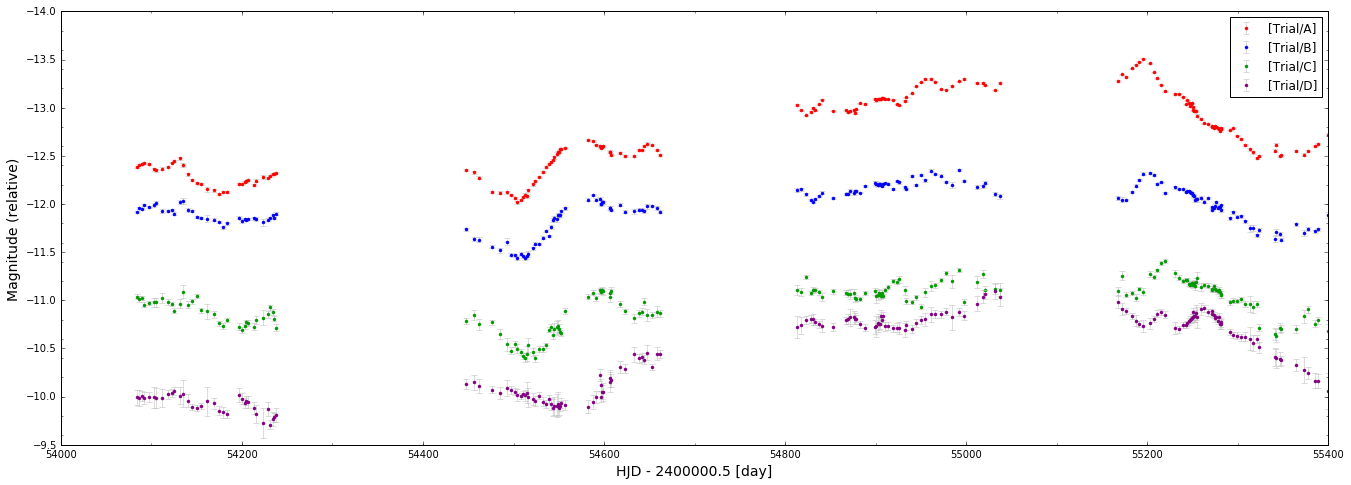

In [4]:
timer.display_light_curves()

Let's use the free-knot spline models for both the intrinsic (AGN) and extrinsic (microlensing) variability on your data, using the `PyCS` code and following the `PyCS` tutorial.

>You can also try `microlensing='polynomial'`.

>By default, `error=None` when calling `estimate_time_delays`:
>To find only the intrinsic variance: `error='intrinsic variance'`.
>To find the full error bars, the relationship between the points, and the instrinsic variance, use: `error='complete'`

Before we run the `pycs` code, let's decide whether we want to see the output or not - by default, `pycs` is very verbose. We do this using a [simple redirection class](http://codereview.stackexchange.com/questions/25417/is-there-a-better-way-to-make-a-function-silent-on-need).

In [7]:
timer.estimate_time_delays(method='pycs', microlensing='spline', agn='spline', error=None, quietly=True)

In [8]:
timer.report_time_delays()

Time Delays:
AB   -4.78
AC  -20.89
AD  -68.09
BC  -16.10
BD  -63.31
CD  -47.21


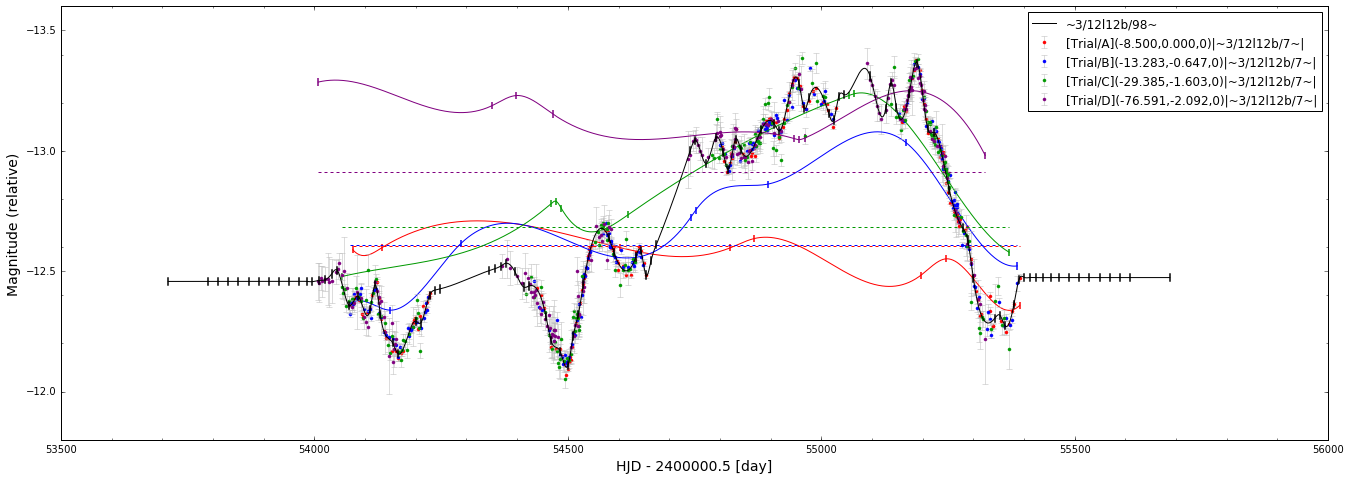

In [9]:
timer.display_light_curves()

While we could have estimated the time delay uncertainties above, with a command like
```python
timer.estimate_time_delays(method='pycs',microlensing='spline',agn='spline',error='complete')
```
we can still do the calculation, with the `estimate_uncertainties` method:

In [5]:
# timer.estimate_uncertainties(n=1,npkl=4)